<a href="https://colab.research.google.com/github/SrinithiReshma/info/blob/main/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Install libraries (if not already installed)
!pip install scikit-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [37]:
# Load the dataset from GitHub URLs
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

# Column names
col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes",
             "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
             "num_shells","num_access_files","num_outbound_cmds","is_host_login",
             "is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
             "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
             "srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
             "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]

# Load train and test data
train = pd.read_csv(train_url, header=None, names=col_names)
test = pd.read_csv(test_url, header=None, names=col_names)


In [38]:
# Label rewriting for binary classification (normal vs anomalous)
train["label"] = train["label"].apply(lambda x: "normal" if x == "normal" else "anomalous")
test["label"] = test["label"].apply(lambda x: "normal" if x == "normal" else "anomalous")

# Dropping the 'num_outbound_cmds' column (it has constant values)
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

def LabelEncoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

LabelEncoding(train)
LabelEncoding(test)


In [39]:
# Splitting features and labels
X_train = train.drop('label', axis=1)
y_train = train['label']
X_test = test.drop('label', axis=1)
y_test = test['label']


In [40]:
# Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label=1)  # '1' corresponds to 'anomalous'

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7710255500354861
Precision: 0.6588448914030309
Recall: 0.9714756461744414
Confusion Matrix:
[[7948 4885]
 [ 277 9434]]


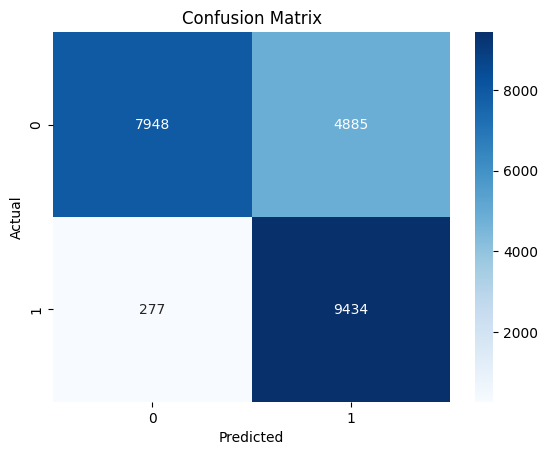

In [42]:
# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [43]:
!pip install scikit-learn


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
X_train = train.drop('label', axis=1)  # Features
y_train = train['label']               # Labels
X_test = test.drop('label', axis=1)    # Features
y_test = test['label']                 # Labels


In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [47]:
rf_pred = rf_model.predict(X_test)


In [49]:
print(y_test.unique())


[0 1]
